In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.pyplot import gcf

In [2]:
#load data
#there appears to be an issue with index_col = [0],  header=[0,1]
wt_conn = pd.read_csv('/Users/samsonkoelle/wt_leafsmooth_leafsurface_sumtarget.csv',  header=[0,1])
Ntsr1_conn =  pd.read_csv('/Users/samsonkoelle/ntsr1_leafsmooth_leafsurface_sumtarget_1201.csv',   header=[0,1])
Cux2_conn = pd.read_csv('/Users/samsonkoelle/cux2_leafsmooth_leafsurface_sumtarget_1201.csv',   header=[0,1])
Rbp4_conn = pd.read_csv('/Users/samsonkoelle/rbp4_leafsmooth_leafsurface_sumtarget_1201.csv',  header=[0,1])
Tlx3_conn = pd.read_csv('/Users/samsonkoelle/tlx3_leafsmooth_leafsurface_sumtarget_1201.csv',   header=[0,1])

def fix_pdcsv(csv):
    
    #wt_conn = pd.read_csv('/Users/samsonkoelle/wt_leafsmooth_leafsurface_sumtarget.csv',  header=[0,1])
    csv_rownames = np.asarray(csv.iloc[:,0])
    csv = csv.iloc[:,1:]
    csv.index = csv_rownames
    return(csv)

wt_conn = fix_pdcsv(wt_conn)
Ntsr1_conn = fix_pdcsv(Ntsr1_conn)
Cux2_conn = fix_pdcsv(Cux2_conn)
Rbp4_conn = fix_pdcsv(Rbp4_conn)
Tlx3_conn = fix_pdcsv(Tlx3_conn)

In [4]:
#comb_data = pd.concat([wt_conn,Cux2_conn,Ntsr1_conn,Rbp4_conn,Tlx3_conn])
comb_data = pd.concat([wt_conn,Cux2_conn,Ntsr1_conn,Rbp4_conn,Tlx3_conn])
#gis are structures with nonzero connectivity
nonzero_leafs  = np.where(np.sum(comb_data, axis = 1) !=0.)[0]


#get layers (inelegant)
layers= np.zeros(comb_data.shape[0], dtype = object)
for i in range(comb_data.shape[0]):
    if np.asarray(list(comb_data.index))[i][-3:] == '2/3':
        layers[i] = '2/3'
    if np.asarray(list(comb_data.index))[i][-1:] == '1':
        layers[i] = '1'
    if np.asarray(list(comb_data.index))[i][-1:] == '4':
        layers[i] = '4'
    if np.asarray(list(comb_data.index))[i][-1:] == '5':
        layers[i] = '5'    
    if np.asarray(list(comb_data.index))[i][-2:] == '6a':
        layers[i] = '6a' 
        #print('6a')
    if np.asarray(list(comb_data.index))[i][-2:] == '6b':
        layers[i] = '6b'

In [5]:
major_ontology = np.load('/Users/samsonkoelle/ontological_order_leaves_majors_names.npy')
summary_ontology = np.load('/Users/samsonkoelle/alleninstitute/sambranch/mouse_connectivity_models/data/ontological_order_leaves_summary.npy')
summary_comb = np.tile(summary_ontology,5)

In [27]:
cre_inds

array(['WT', 'WT', 'WT', ..., 'Tlx3', 'Tlx3', 'Tlx3'], dtype='<U9')

In [2]:
cre_inds = np.concatenate([np.repeat('WT',541), np.repeat('Cux2',541), np.repeat('Ntsr1',541), np.repeat('Rbp4',541),
np.repeat('Tlx3',541) ])#[nonzero_leafs] #ctsss
#codes = cre_inds
#multiind cre_inds, layers, summary
row_multi_ind = np.vstack([cre_inds,summary_comb,layers])
row_multi_ind = np.asarray(row_multi_ind)
row_multi_ind_tuples = list(zip(*row_multi_ind))
row_multi_ind_tuples = pd.MultiIndex.from_tuples(row_multi_ind_tuples, names=['Cre', 'Summary Structure','Layer'])
vis_inds = np.where(np.asarray([Cux2_conn.index[i][:3] == 'VIS' for i in range(540)]))[0]
vis_inds  = np.concatenate([vis_inds, vis_inds + 540*1, vis_inds + 540*2, vis_inds + 540*3, vis_inds + 540*4])
keep_ind = np.intersect1d(vis_inds, nonzero_leafs)
row_multi_ind_tuples = row_multi_ind_tuples[keep_ind]

NameError: name 'np' is not defined

In [1]:
keep_ind.shape

NameError: name 'keep_ind' is not defined

In [32]:
cre_labels = row_multi_ind_tuples.get_level_values("Cre")
cre_pal = sns.color_palette("cubehelix", n_colors = cre_labels.unique().size)
cre_lut = dict(zip(map(str, cre_labels.unique()), cre_pal))
cre_colors = pd.Series(cre_labels, index=row_multi_ind_tuples).map(cre_lut)

summary_labels = row_multi_ind_tuples.get_level_values("Summary Structure")
summary_pal = sns.color_palette("Paired", summary_labels.unique().size) #sns.cubehelix_palette(summary_labels.unique().size, light=.9, dark=0.1, reverse=False, start=0, rot=-1, hue = 1)#sns.cubehelix_palette(summary_labels.unique().size, light=1., dark=0., reverse=False, start=0, rot=-1, hue = 1)
summary_lut = dict(zip(map(str, summary_labels.unique()), summary_pal))
summary_colors = pd.Series(summary_labels, index=row_multi_ind_tuples).map(summary_lut)

layer_labels = row_multi_ind_tuples.get_level_values("Layer")
layer_pal = sns.color_palette("viridis", n_colors = layer_labels.unique().size) #sns.cubehelix_palette(layer_labels.unique().size, light=1., dark=0., reverse=False, start=0, rot=-1, hue = 1)
layer_lut = dict(zip(map(str, layer_labels.unique()), layer_pal))
layer_colors = pd.Series(layer_labels, index=row_multi_ind_tuples).map(layer_lut)

arr = np.zeros((len(keep_ind),3), dtype = object)
arr[:,0] = cre_colors
arr[:,1] = summary_colors
arr[:,2] = layer_colors
combined_colors = pd.DataFrame(arr, index = summary_colors.index)

comb_data_vis = comb_data.iloc[keep_ind]
comb_data_vis.index = row_multi_ind_tuples

In [35]:
major_ontoloogy_summary = np.load('/Users/samsonkoelle/ontological_order_summary_majors_names.npy')
targs = np.where(np.isin(major_ontoloogy_summary,['Isocortex','TH']))[0]

In [36]:
maj_labels = major_ontoloogy_summary
maj_pal = sns.color_palette("cubehelix", n_colors = 12)
maj_lut = dict(zip(map(str, np.unique(major_ontoloogy_summary)), maj_pal))
maj_colors = pd.Series(maj_labels, index=wt_conn.columns[:291]).map(maj_lut)

In [37]:
combined_colors.columns = ['Creline','Summary Structure','Layer']

[]

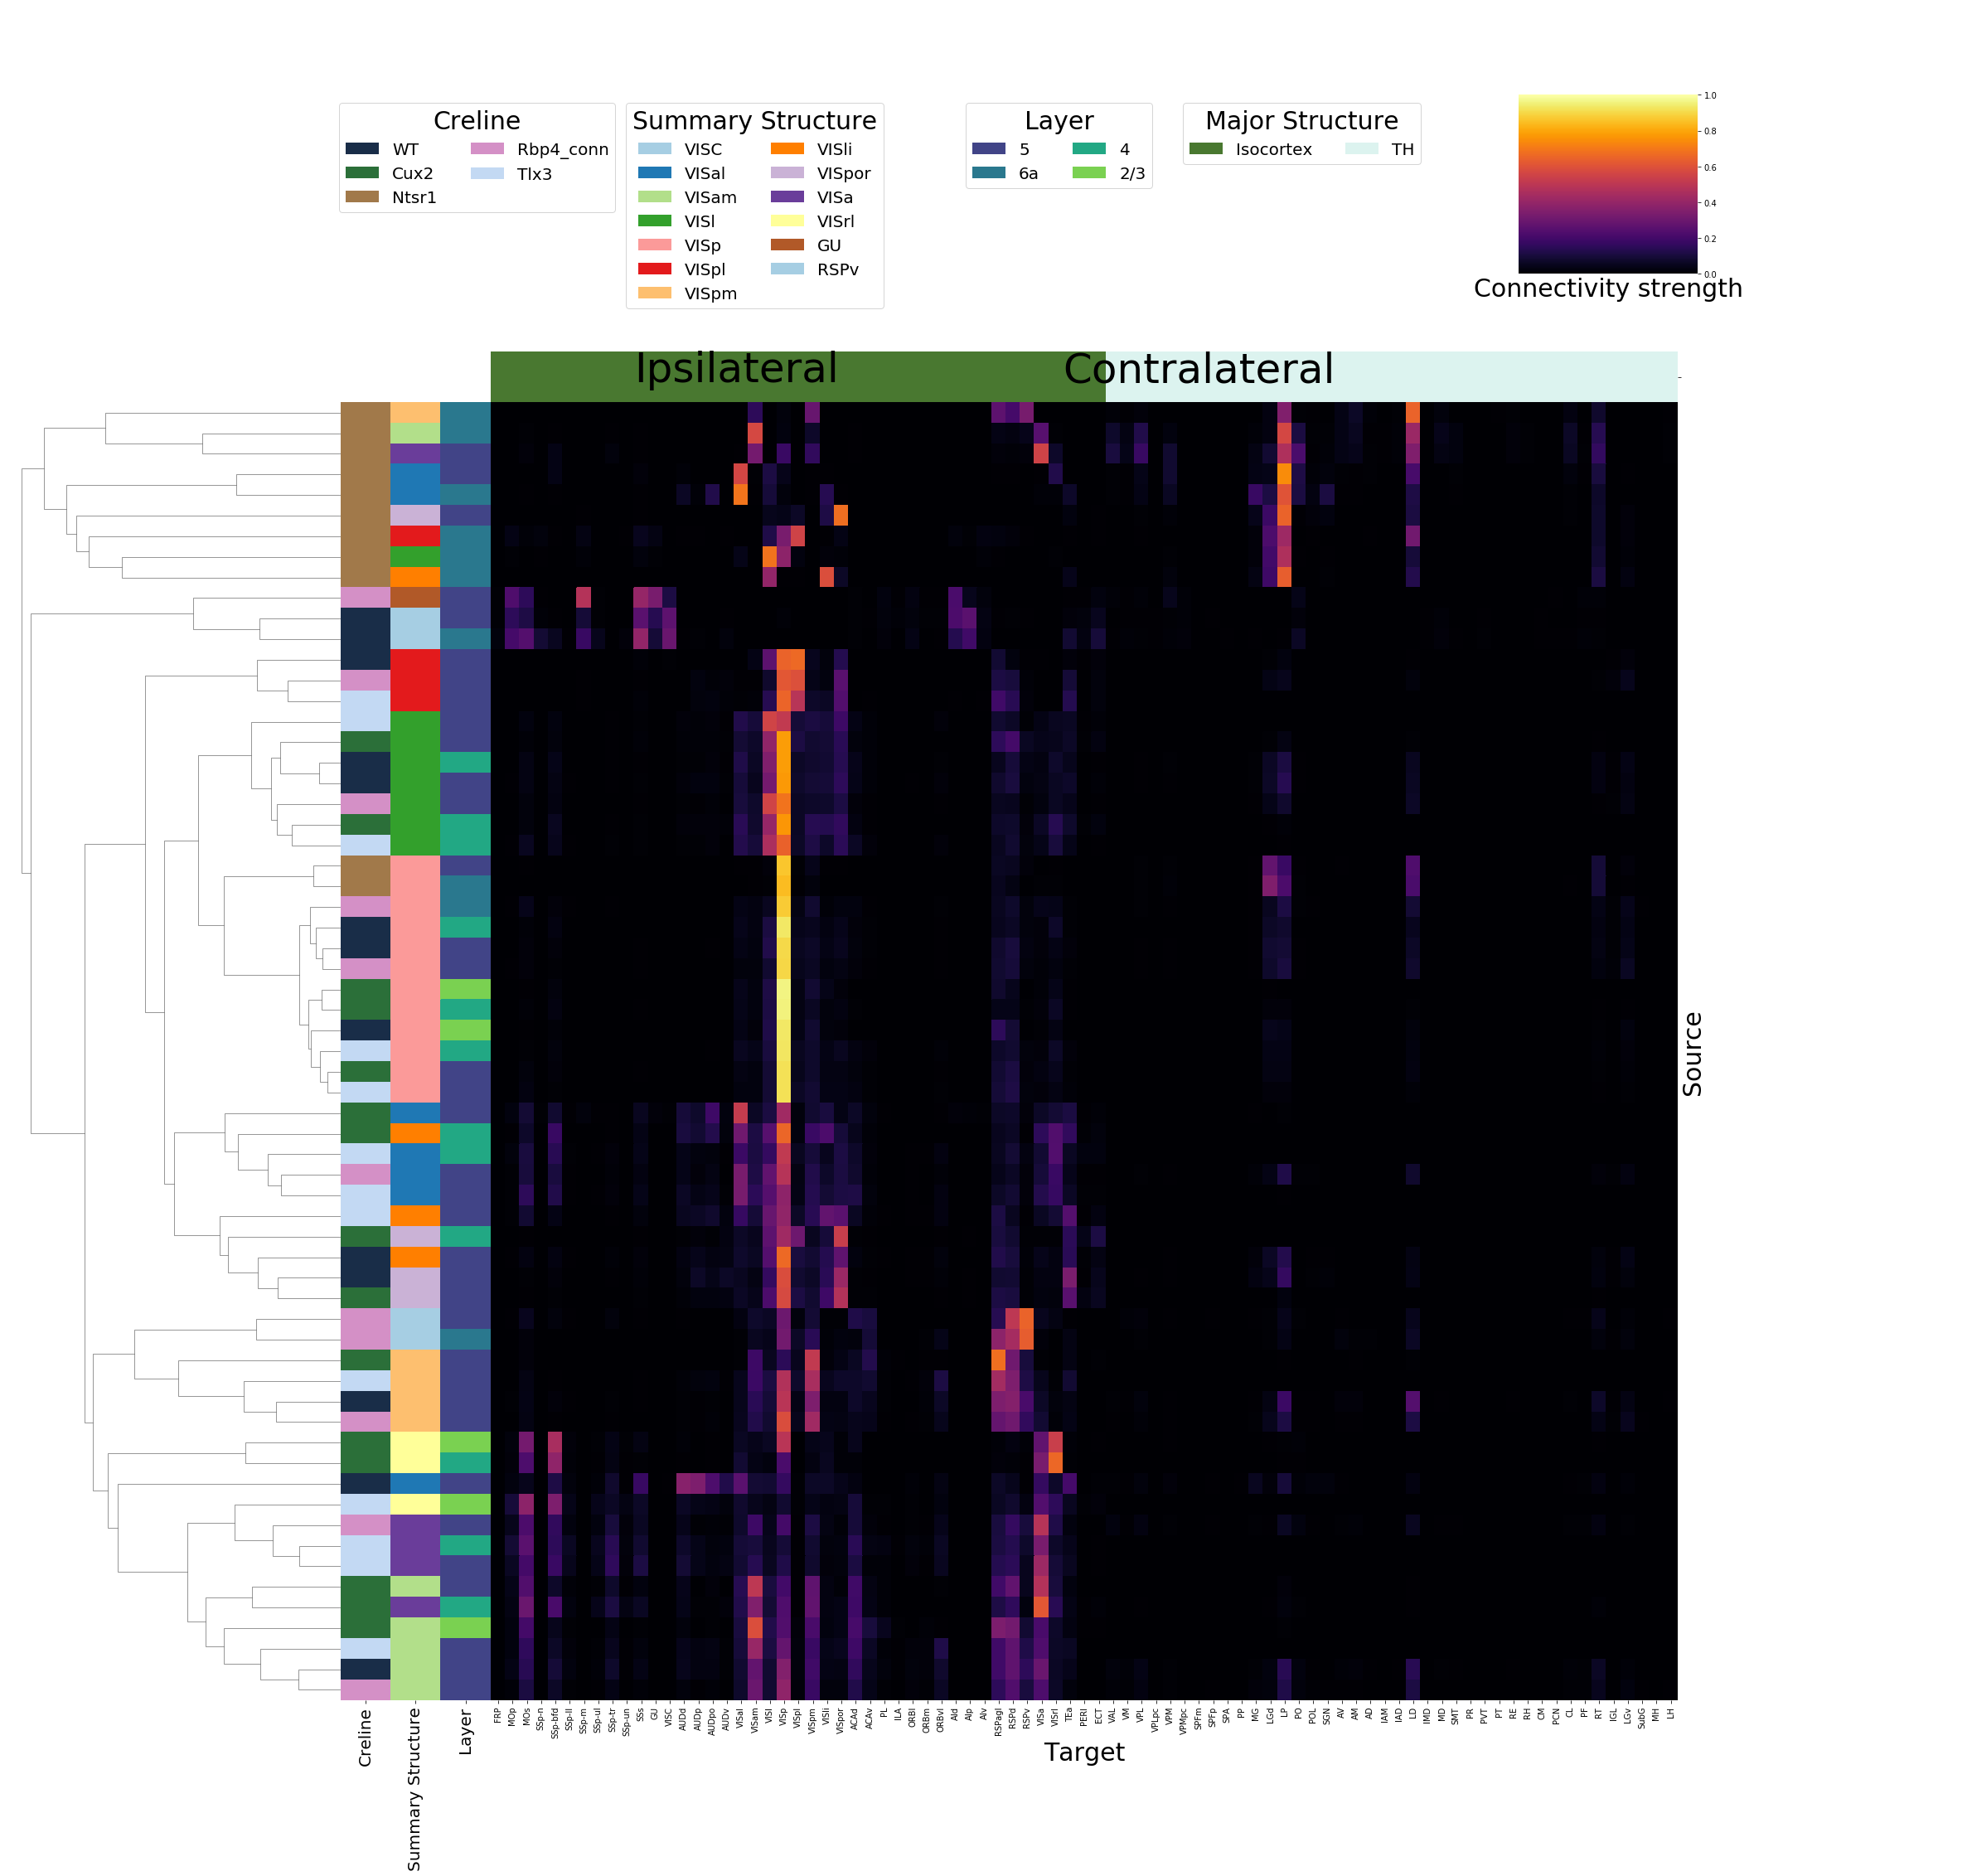

In [18]:
g = sns.clustermap(comb_data_vis.iloc[:,targs],
    row_cluster=True, col_cluster=False,
    row_colors = combined_colors,
    col_colors = maj_colors[targs],
    linewidths=0,
    cmap = mpl.cm.inferno, figsize = (30,30), vmin = 0., vmax = 1.)

g.ax_row_colors.set_xticklabels(['Creline','Summary Structure','Layer'], fontsize = 20)
ax = gcf().add_axes((1.,0.,0.,0.))
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
for label in cre_labels.unique():
    ax.bar(0, 0, color=cre_lut[label], label=label, linewidth=0.)
l1 = ax.legend(title='Creline', ncol=2, bbox_to_anchor=(0.35, .95), bbox_transform=gcf().transFigure, fontsize = 20,title_fontsize=30)    

ax = gcf().add_axes((0.3,1.,0.,0.))
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
for label in summary_labels.unique():
    ax.bar(0, 0, color=summary_lut[label], label=label, linewidth=0.)
l2 = ax.legend(title='Summary Structure', ncol=2, bbox_to_anchor=(0.5, .95), bbox_transform=gcf().transFigure, fontsize = 20,title_fontsize=30)    

ax = gcf().add_axes((0.4,1.,0.,0.))
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
for label in layer_labels.unique():
    ax.bar(0, 0, color=layer_lut[label], label=label, linewidth=0.)
l3 = ax.legend(title='Layer', ncol=2, bbox_to_anchor=(0.65, .95), bbox_transform=gcf().transFigure, fontsize = 20,title_fontsize=30)    

ax = gcf().add_axes((1.1,.8,0.,0.))
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
for label in ['Isocortex','TH']:
    ax.bar(0, 0, color=maj_lut[label], label=label, linewidth=0.)
l4 = ax.legend(title='Major Structure', ncol=2, bbox_to_anchor=(0.8, .95), bbox_transform=gcf().transFigure, fontsize = 20,title_fontsize=30)    

#ax = gcf().add_axes((0.8,1.,0.,0.))
#cbar = g.ax_cbar.colorbar(g, cax=ax, orientation='vertical')
#cbar.ax.tick_params(labelsize=20)
#cbar.set_label('Connectivity strength', rotation=0)
g.ax_cbar.set_xlabel('Connectivity strength', rotation=0, fontsize = 30)
g.ax_cbar.set_position([0.85,0.85,.1,.1])
#cbar.ax.yaxis.set_ticks_position('left')
g.ax_col_colors.text(10.,.6, 'Ipsilateral', fontsize = 50)
g.ax_col_colors.text(40.,.6, 'Contralateral', fontsize = 50)

g.ax_heatmap.set_xlabel('Target', fontsize = 30)
g.ax_heatmap.set_ylabel('Source', fontsize = 30)

g.ax_heatmap.set_xticklabels(np.asarray(list(comb_data_vis.columns))[targs,1])
g.ax_heatmap.set_yticklabels([])
g.ax_heatmap.set_yticks([])

#plt.savefig('/Users/samsonkoelle/alleninstitute/sambranch/mouse_connectivity_models/paper/figures/Figure4')

In [38]:
import matplotlib as mpl
from pylab import rcParams

mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command



[]

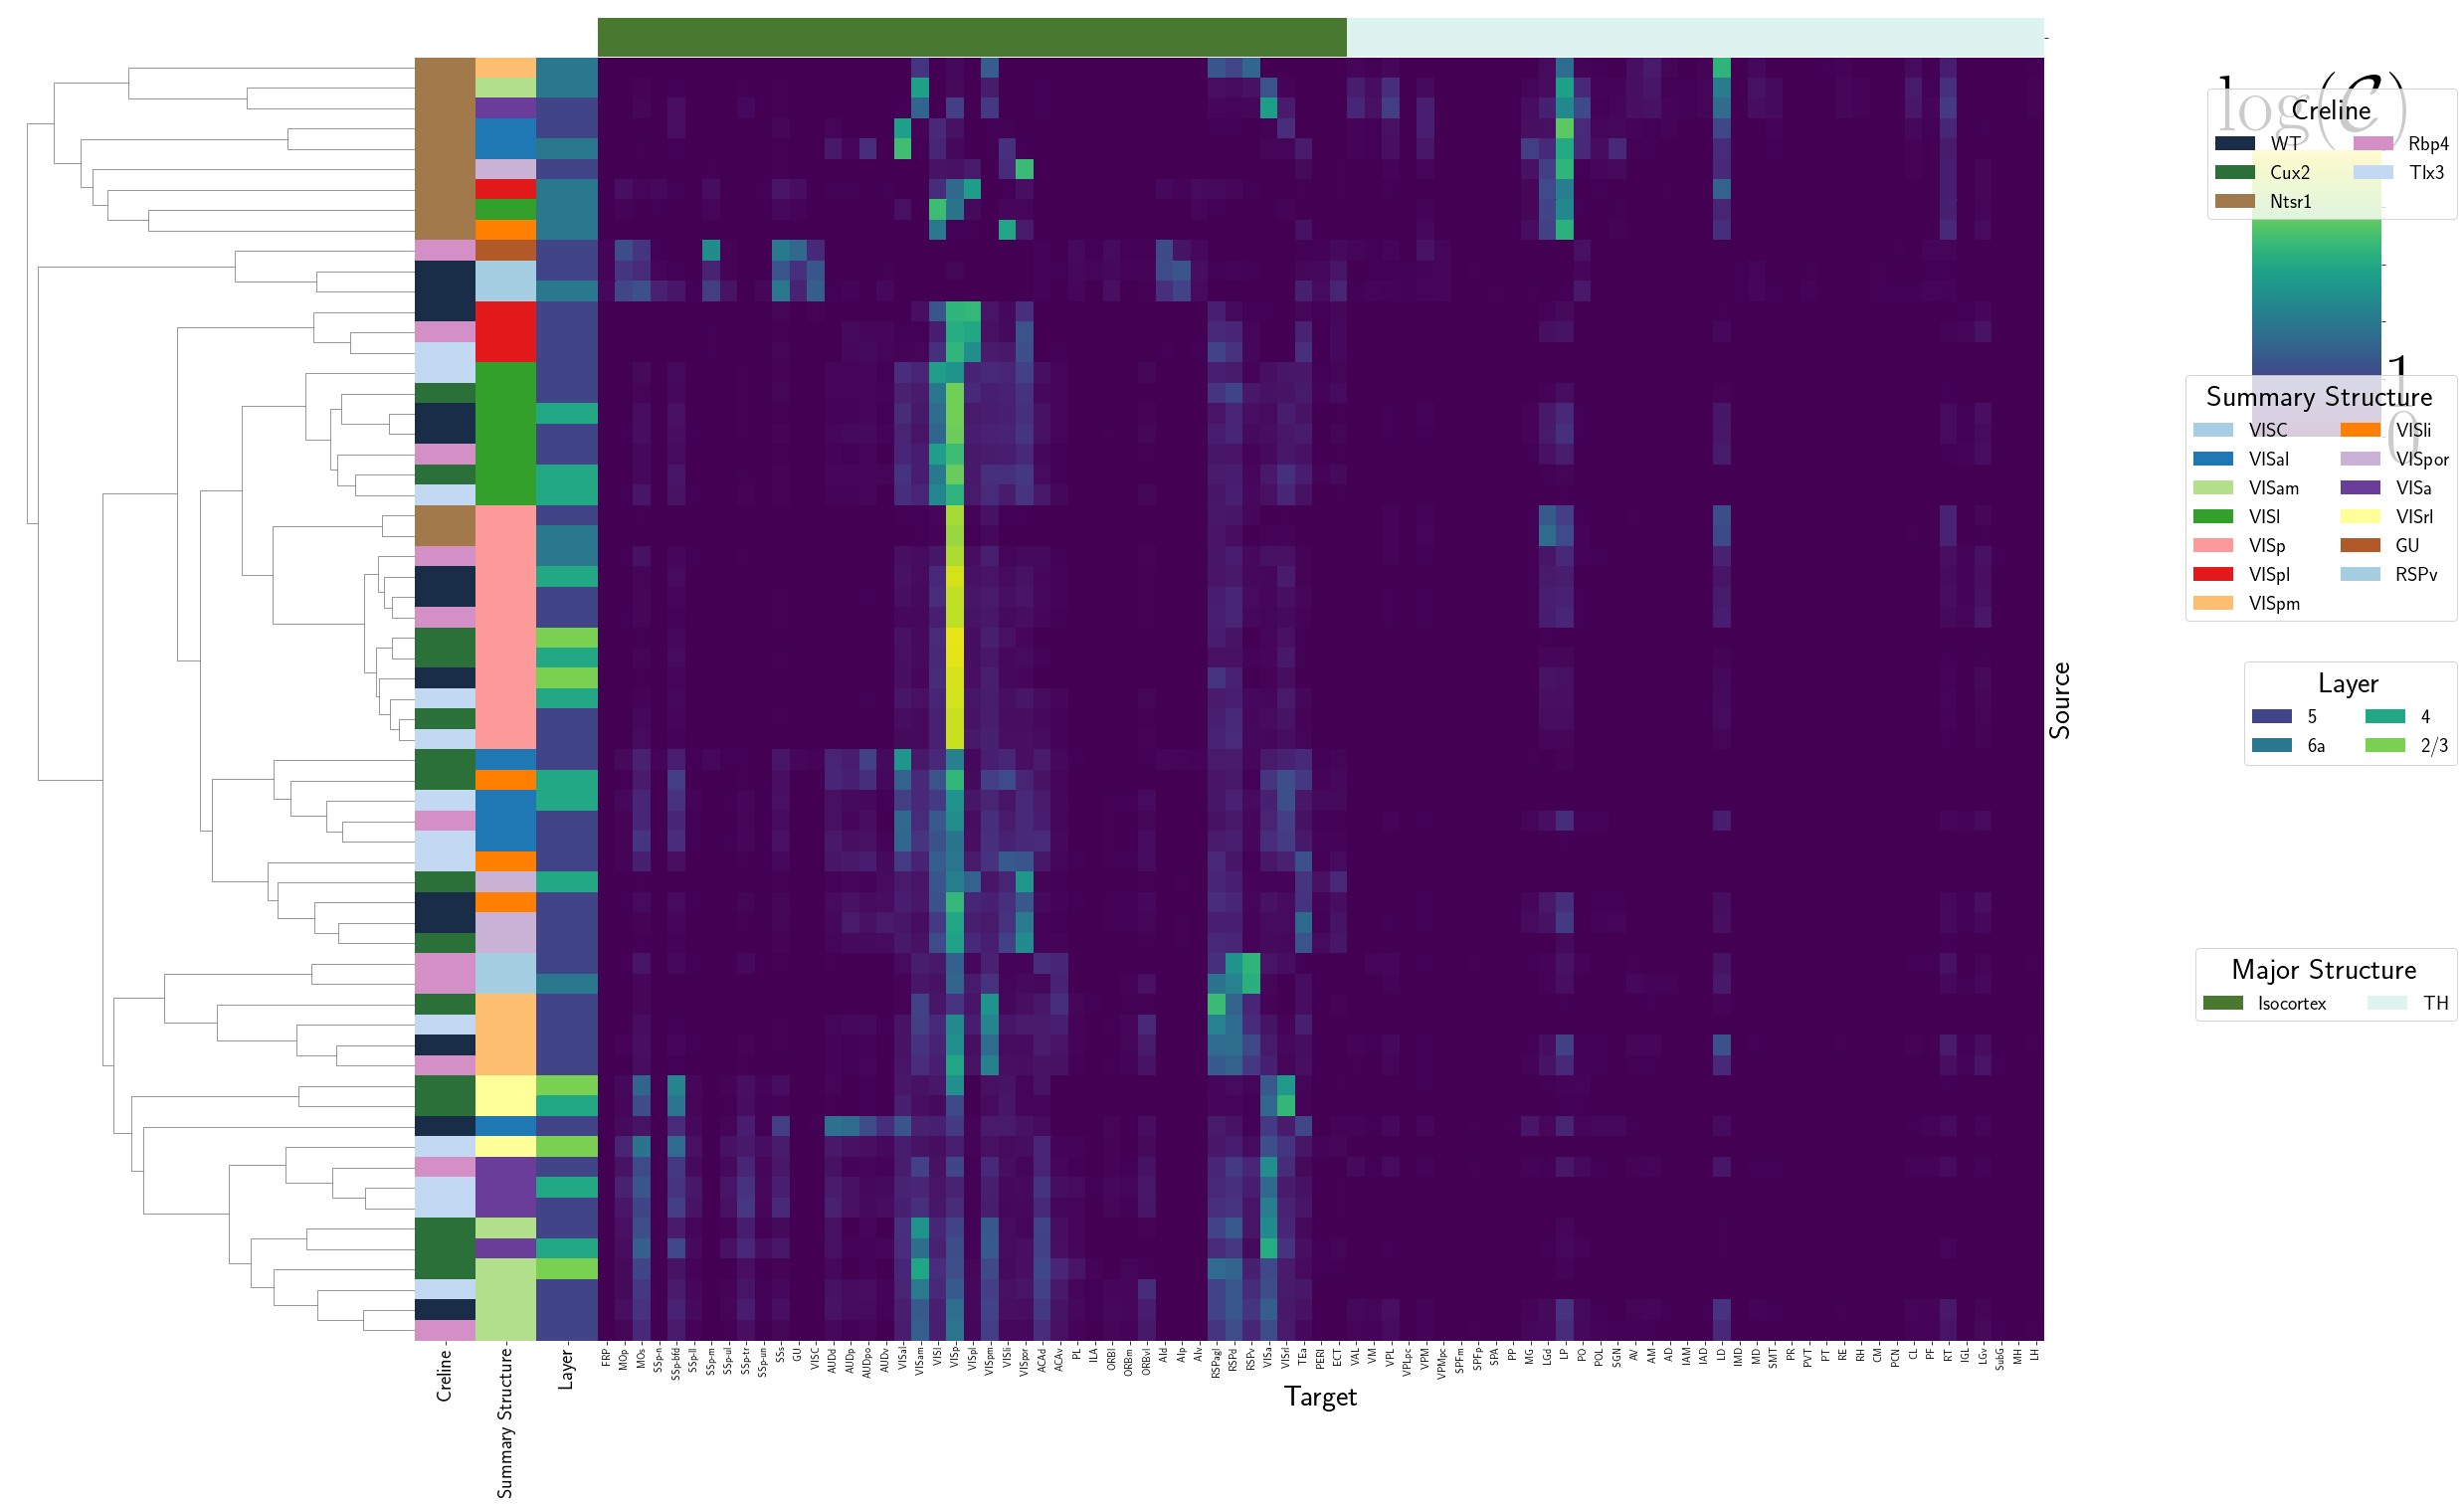

In [40]:
g = sns.clustermap(comb_data_vis.iloc[:,targs],
    row_cluster=True, col_cluster=False,
    row_colors = combined_colors,
    col_colors = maj_colors[targs],
    linewidths=0,
    cmap = mpl.cm.viridis, figsize = (30,20), vmin = 0., vmax = 1.,
                  dendrogram_ratio=(0.2,0.0))

g.ax_row_colors.set_xticklabels(['Creline','Summary Structure','Layer'], fontsize = 20)
ax = gcf().add_axes((1.,0.,0.,0.))
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
for label in cre_labels.unique():
    ax.bar(0, 0, color=cre_lut[label], label=label, linewidth=0.)
l1 = ax.legend(title='Creline', ncol=2, bbox_to_anchor=(1.15, .95), bbox_transform=gcf().transFigure, fontsize = 20,title_fontsize=30)    

ax = gcf().add_axes((0.3,1.,0.,0.))
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
for label in summary_labels.unique():
    ax.bar(0, 0, color=summary_lut[label], label=label, linewidth=0.)
l2 = ax.legend(title='Summary Structure', ncol=2, bbox_to_anchor=(1.15, .75), bbox_transform=gcf().transFigure, fontsize = 20,title_fontsize=30)    

ax = gcf().add_axes((0.4,1.,0.,0.))
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
for label in layer_labels.unique():
    ax.bar(0, 0, color=layer_lut[label], label=label, linewidth=0.)
l3 = ax.legend(title='Layer', ncol=2, bbox_to_anchor=(1.15, .55), bbox_transform=gcf().transFigure, fontsize = 20,title_fontsize=30)    

ax = gcf().add_axes((1.1,.8,0.,0.))
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
for label in ['Isocortex','TH']:
    ax.bar(0, 0, color=maj_lut[label], label=label, linewidth=0.)
l4 = ax.legend(title='Major Structure', ncol=2, bbox_to_anchor=(1.15, .35), bbox_transform=gcf().transFigure, fontsize = 20,title_fontsize=30)    

#ax = gcf().add_axes((0.8,1.,0.,0.))
#cbar = g.ax_cbar.colorbar(g, cax=ax, orientation='vertical')
#cbar.ax.tick_params(labelsize=20)
#cbar.set_label('Connectivity strength', rotation=0)
# g.ax_cbar.set_xlabel('Connectivity strength', rotation=0, fontsize = 30)
# g.ax_cbar.set_position([0.85,0.85,.1,.1])
# #cbar.ax.yaxis.set_ticks_position('left')
# g.ax_col_colors.text(10.,.6, 'Ipsilateral', fontsize = 50)
# g.ax_col_colors.text(40.,.6, 'Contralateral', fontsize = 50)

g.ax_cbar.set_title(r"$\log (\mathcal C)$", rotation=0, fontsize = 80)
g.ax_cbar.set_yticklabels(g.ax_cbar.get_yticklabels(), fontsize=80)
g.ax_cbar.set_position([1.05,0.7,.06,.2])


g.ax_heatmap.set_xlabel('Target', fontsize = 30)
g.ax_heatmap.set_ylabel('Source', fontsize = 30)

g.ax_heatmap.set_xticklabels(np.asarray(list(comb_data_vis.columns))[targs,1])
g.ax_heatmap.set_yticklabels([])
g.ax_heatmap.set_yticks([])

#plt.savefig('/Users/samsonkoelle/alleninstitute/sambranch/mouse_connectivity_models/paper/figures/Figure4')

In [108]:
g.ax_row_colors.set_xticklabels('Creline','Summary Structure','Layer', fontsize = 20)

Help on function clustermap in module seaborn.matrix:

clustermap(data, *, pivot_kws=None, method='average', metric='euclidean', z_score=None, standard_scale=None, figsize=(10, 10), cbar_kws=None, row_cluster=True, col_cluster=True, row_linkage=None, col_linkage=None, row_colors=None, col_colors=None, mask=None, dendrogram_ratio=0.2, colors_ratio=0.03, cbar_pos=(0.02, 0.8, 0.05, 0.18), tree_kws=None, **kwargs)
    Plot a matrix dataset as a hierarchically-clustered heatmap.
    
    Parameters
    ----------
    data : 2D array-like
        Rectangular data for clustering. Cannot contain NAs.
    pivot_kws : dict, optional
        If `data` is a tidy dataframe, can provide keyword arguments for
        pivot to create a rectangular dataframe.
    method : str, optional
        Linkage method to use for calculating clusters. See
        :func:`scipy.cluster.hierarchy.linkage` documentation for more
        information.
    metric : str, optional
        Distance metric to use for the da

In [ ]:
g.ax_row_colors.s

In [ ]:
g.ax_cbar

In [82]:
np.asarray(list(comb_data_vis.columns))[targs,1]

array(['FRP', 'MOp', 'MOs', 'SSp-n', 'SSp-bfd', 'SSp-ll', 'SSp-m',
       'SSp-ul', 'SSp-tr', 'SSp-un', 'SSs', 'GU', 'VISC', 'AUDd', 'AUDp',
       'AUDpo', 'AUDv', 'VISal', 'VISam', 'VISl', 'VISp', 'VISpl',
       'VISpm', 'VISli', 'VISpor', 'ACAd', 'ACAv', 'PL', 'ILA', 'ORBl',
       'ORBm', 'ORBvl', 'AId', 'AIp', 'AIv', 'RSPagl', 'RSPd', 'RSPv',
       'VISa', 'VISrl', 'TEa', 'PERI', 'ECT', 'VAL', 'VM', 'VPL', 'VPLpc',
       'VPM', 'VPMpc', 'SPFm', 'SPFp', 'SPA', 'PP', 'MG', 'LGd', 'LP',
       'PO', 'POL', 'SGN', 'AV', 'AM', 'AD', 'IAM', 'IAD', 'LD', 'IMD',
       'MD', 'SMT', 'PR', 'PVT', 'PT', 'RE', 'RH', 'CM', 'PCN', 'CL',
       'PF', 'RT', 'IGL', 'LGv', 'SubG', 'MH', 'LH'], dtype='<U7')

In [71]:
comb_data_vis.columns.get_level_values('second')

KeyError: 'Level second not found'

In [73]:
g.ax_heatmap.set_xlabel

FrozenList([['contra', 'first', 'ipsi'], ['AAA', 'ACAd', 'ACAv', 'ACB', 'ACVII', 'AD', 'ADP', 'AHN', 'AId', 'AIp', 'AIv', 'AM', 'AMB', 'AN', 'AOB', 'AON', 'AP', 'APN', 'ARH', 'ASO', 'AT', 'AUDd', 'AUDp', 'AUDpo', 'AUDv', 'AV', 'AVP', 'AVPV', 'B', 'BA', 'BAC', 'BLA', 'BMA', 'BST', 'CA1', 'CA2', 'CA3', 'CEA', 'CENT', 'CL', 'CLA', 'CLI', 'CM', 'COAa', 'COAp', 'COPY', 'CP', 'CS', 'CU', 'CUL', 'CUN', 'DCO', 'DEC', 'DG', 'DMH', 'DMX', 'DN', 'DP', 'DR', 'DTN', 'ECT', 'ECU', 'ENTl', 'ENTm', 'EPd', 'EPv', 'EW', 'FC', 'FL', 'FN', 'FOTU', 'FRP', 'FS', 'GPe', 'GPi', 'GR', 'GRN', 'GU', 'IA', 'IAD', 'IAM', 'IC', 'ICB', 'IF', 'IG', 'IGL', 'III', 'ILA', 'IMD', 'IO', 'IP', 'IPN', 'IRN', 'ISN', 'IV', 'LA', 'LAV', 'LC', 'LD', 'LDT', ...]])

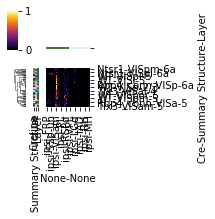

In [60]:
g = sns.clustermap(comb_data_vis.iloc[:,targs],
    row_cluster=True, col_cluster=False,
    row_colors = combined_colors,
    col_colors = maj_colors[targs],
    linewidths=0,
    cmap = mpl.cm.inferno, figsize = (3,3), vmin = 0., vmax = 1.)


In [ ]:
g.

In [37]:
help(gcf().add_axes)

Help on method add_axes in module matplotlib.figure:

add_axes(*args, **kwargs) method of matplotlib.figure.Figure instance
    Add an axes to the figure.
    
    Call signatures::
    
        add_axes(rect, projection=None, polar=False, **kwargs)
        add_axes(ax)
    
    Parameters
    ----------
    
    rect : sequence of float
        The dimensions [left, bottom, width, height] of the new axes. All
        quantities are in fractions of figure width and height.
    
    projection : {None, 'aitoff', 'hammer', 'lambert', 'mollweide', 'polar', 'rectilinear', str}, optional
        The projection type of the `~.axes.Axes`. *str* is the name of
        a custom projection, see `~matplotlib.projections`. The default
        None results in a 'rectilinear' projection.
    
    polar : boolean, optional
        If True, equivalent to projection='polar'.
    
    sharex, sharey : `~.axes.Axes`, optional
        Share the x or y `~matplotlib.axis` with sharex and/or sharey.
        

<Figure size 432x288 with 0 Axes>